Updated: 20/02/2024

This code varies the frequency to fine the one that minimises mismatch across a range of start times. It plots this to check whether frequency hovers around the expected value (for memory modes). 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfitsrd as qnmfits
from multiprocessing import Pool
from spatial_reconstruction_tests.spatial_reconstruction import *
from matplotlib.animation import FuncAnimation
from scipy.interpolate import UnivariateSpline
from Visualisation.qnm_vis import * 
from qnmfitsrd.CCE_file_getter import *
import datetime
from scipy.optimize import least_squares

l_max = 7
n_max = 7

ModuleNotFoundError: No module named 'spatial_reconstruction_tests.spatial_reconstruction'

In [ ]:
CCE_sim1 = CCE_to_sim_simplified(sim_num='0001')
CCE_sim2 = CCE_to_sim_simplified(sim_num='0002')
CCE_sim3 = CCE_to_sim_simplified(sim_num='0003')
CCE_sim4 = CCE_to_sim_simplified(sim_num='0004')
CCE_sim5 = CCE_to_sim_simplified(sim_num='0005')
CCE_sim6 = CCE_to_sim_simplified(sim_num='0006')
CCE_sim7 = CCE_to_sim_simplified(sim_num='0007')
CCE_sim8 = CCE_to_sim_simplified(sim_num='0008')
CCE_sim9 = CCE_to_sim_simplified(sim_num='0009')
CCE_sim10 = CCE_to_sim_simplified(sim_num='0010')
CCE_sim11 = CCE_to_sim_simplified(sim_num='0011')
CCE_sim12 = CCE_to_sim_simplified(sim_num='0012')
CCE_sim13 = CCE_to_sim_simplified(sim_num='0013')

CCE_sim305 = CCE_to_sim_simplified(sim_num='0305')

# Reproducing Fig. 1

Note this doesn't use the CCE waveforms.

Assume linear model fits to a particular l,m using only the QNM harmonics of that l,m

In [ ]:
quadratic_mode = (2,2,0,1,2,-2,0,-1) 
spherical_mode = (4,0) 
sim = CCE_sim305
#CCE_sim12

l,m = spherical_mode 
lp,mp,nprime,pp,lpp,mpp,npp,ppp = quadratic_mode

NameError: name 'CCE_sim305' is not defined

# Fig. 4 with all frequencies plotted

In [ ]:
model_q = [(l,m,n,1) for n in range(2+1)] + [(l,m,n,-1) for n in range(2+1)]

print(model_q)

NameError: name 'l' is not defined

In [ ]:
omega_fit_list = []
t0_list = np.linspace(-30, 30, 100)

for t0 in t0_list:
    omega_fit_list.append(qnmfits.free_frequency_fit(
        sim.times, 
        sim.h[l,m], 
        t0=t0,
        modes=model_q,
        Mf=sim.Mf,
        chif=sim.chif_mag
    ))
    
omega_fit_list = np.array(omega_fit_list)

omega_average = np.mean(omega_fit_list, axis=0)

Text(0, 0.5, '$Im(\\omega)$')

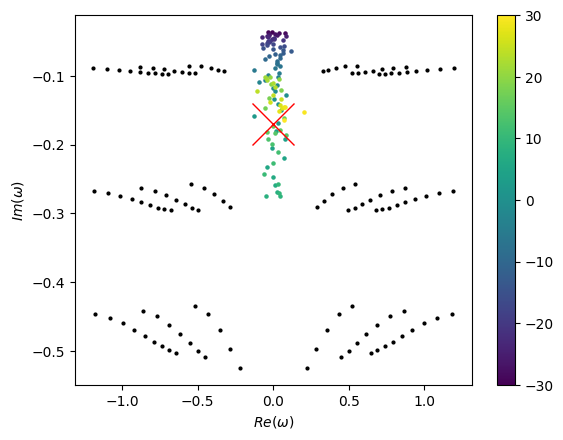

In [ ]:
fig, ax = plt.subplots() 
#ax.set_xlim(-0.1, 0.1)
#ax.set_ylim(-0.35, -0.11)

cmap = plt.get_cmap('viridis')
min_val = min(t0_list)
max_val = max(t0_list)
norm = plt.Normalize(min_val, max_val)

jitter = 0.05

for i, t0 in enumerate(t0_list):
    color = cmap(norm(t0))
    x_jitter = np.random.normal(0, jitter)
    ax.scatter(omega_fit_list[i].real + x_jitter, omega_fit_list[i].imag, color=color, s=5) 

quadratic_frequency = qnm.omega_list([quadratic_mode], sim.chif_mag, sim.Mf)
ax.plot(quadratic_frequency[0].real, quadratic_frequency[0].imag, color='r', marker='x', markersize=30)

all_qnms = [(lam,mu,n,p) for lam in np.arange(2, 4+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, 2+1)
                              for p in (-1, +1)]

all_freqs = np.array(qnm.omega_list(all_qnms, sim.chif_mag, sim.Mf))
for i, freq in enumerate(all_freqs):
    ax.plot(freq.real, freq.imag, color='black', marker='o', markersize=2)

#ax.axvline(omega_average.real, linestyle='--', color='black')
#ax.axhline(omega_average.imag, linestyle='--', color='black')

fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)

ax.xaxis.set_label_text(r'$Re(\omega)$')
ax.yaxis.set_label_text(r'$Im(\omega)$')


In [ ]:
test_qnms = [(2,2,0,1,2,-2,0,-1), (2,0,0,1), (2,0,0,-1), (2,2,0,1), (2,-2,0,-1)]

test_frequencies = qnm.omega_list(test_qnms, sim.chif_mag, sim.Mf)

print(test_frequencies)

[-0.17034469156556767j, (0.41342267513964504-0.08885941763860356j), (-0.41342267513964504-0.08885941763860356j), (0.5557819110480493-0.08517234578278383j), (-0.5557819110480493-0.08517234578278383j)]
